### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Load the dataset

In [2]:
df = pd.read_csv(r'data/train.csv',usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Traditional pandas way of filling missing values

In [5]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

#### Bar Plot before filling missing values - GarageQual

<Axes: xlabel='GarageQual'>

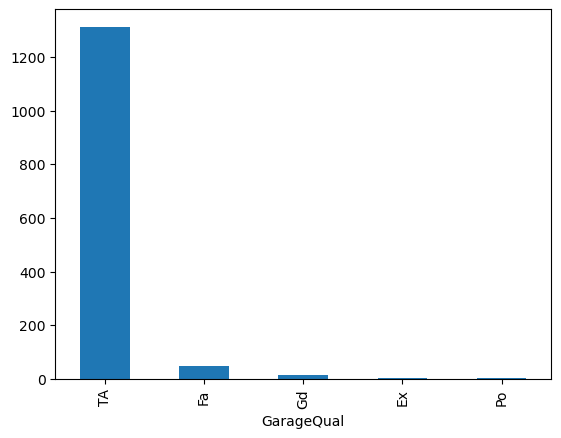

In [6]:
df['GarageQual'].value_counts().plot(kind='bar')

#### KDE before filling missing values - GarageQual

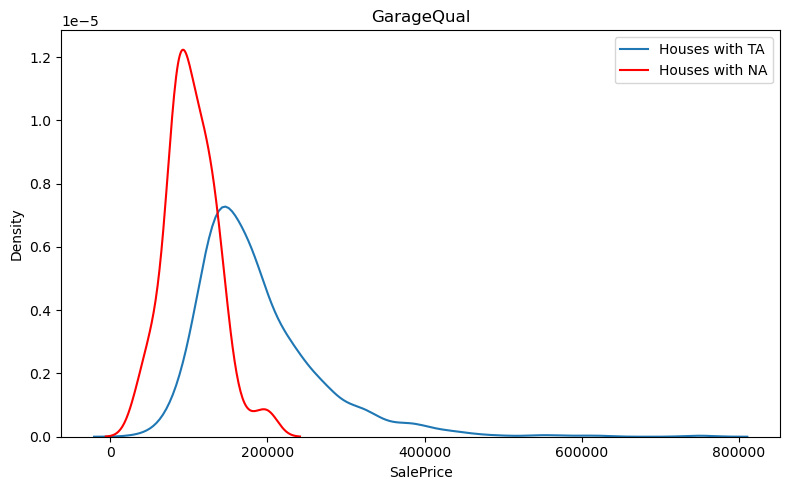

In [7]:
plt.figure(figsize=(8, 5))

# KDE plot for GarageQual == 'TA'
sns.kdeplot(
    data=df[df['GarageQual'] == 'TA'],
    x='SalePrice',
    label='Houses with TA'
)

# KDE plot for missing GarageQual
sns.kdeplot(
    data=df[df['GarageQual'].isnull()],
    x='SalePrice',
    color='red',
    label='Houses with NA'
)

plt.title('GarageQual')
plt.legend(loc='best')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

#### Filling missing values with "TA"

In [8]:
# Store the original subset in a temp_df (will use for plotting)
temp_df = df[df['GarageQual'] == 'TA']['SalePrice']
temp_df.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [9]:
df['GarageQual'].fillna("TA", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16508\2920519651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna("TA", inplace=True)


#### Bar Plot after filling missing values - GarageQual

<Axes: xlabel='GarageQual'>

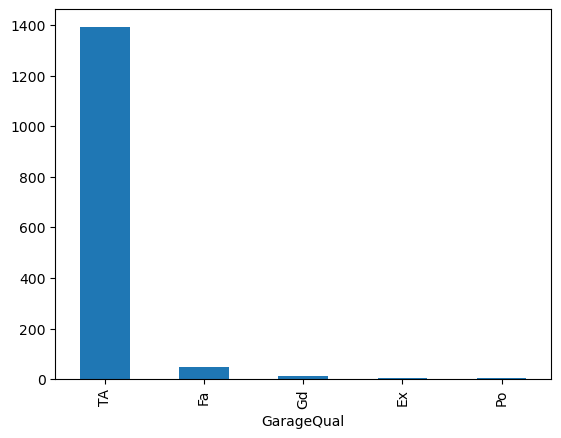

In [10]:
df['GarageQual'].value_counts().plot(kind='bar')

#### KDE plot after filling missing values - GarageQual

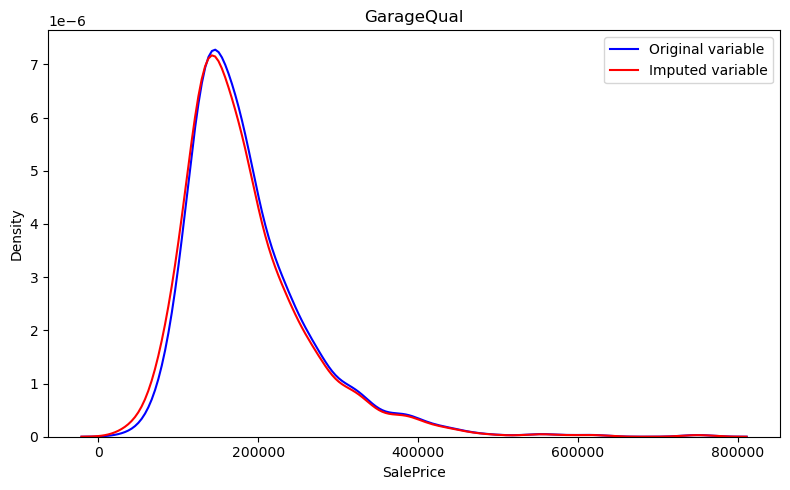

In [11]:
plt.figure(figsize=(8, 5))

# KDE of original (before imputation)
sns.kdeplot(
    data=temp_df,
    color='blue',
    label='Original variable'
)

# KDE of imputed (after filling with 'TA', or values now marked as 'TA')
sns.kdeplot(
    data=df[df['GarageQual'] == 'TA']['SalePrice'],
    color='red',
    label='Imputed variable'
)

plt.title('GarageQual')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [12]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

#### Bar Plot before filling missing values - FireplaceQu

<Axes: xlabel='FireplaceQu'>

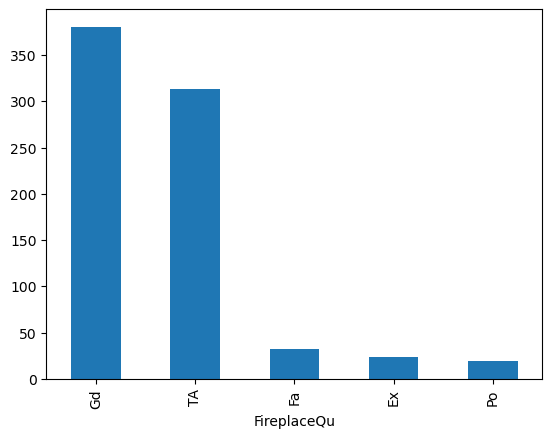

In [13]:
df['FireplaceQu'].value_counts().plot(kind='bar')

#### KDE plot before filling missing values - FirepalceQu

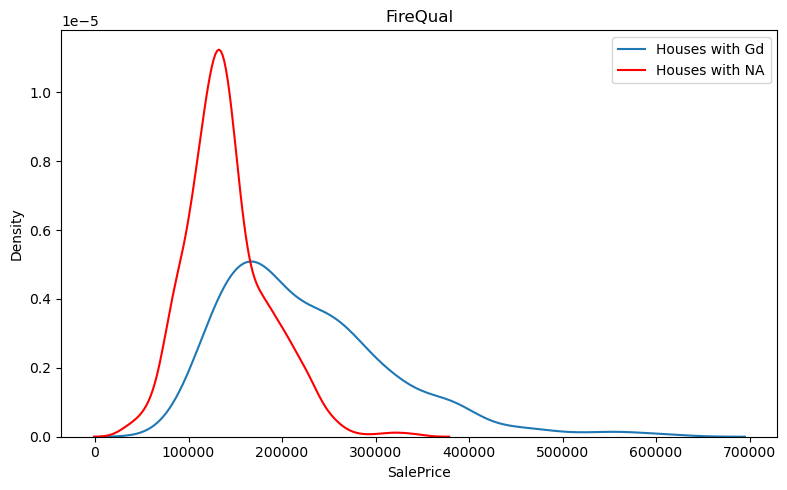

In [14]:
plt.figure(figsize=(8, 5))

# KDE plot for FireQual == 'Gd'
sns.kdeplot(
    data=df[df['FireplaceQu'] == 'Gd'],
    x='SalePrice',
    label='Houses with Gd'
)

# KDE plot for missing FireQual
sns.kdeplot(
    data=df[df['FireplaceQu'].isnull()],
    x='SalePrice',
    color='red',
    label='Houses with NA'
)

plt.title('FireQual')
plt.legend(loc='best')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [15]:
temp_df = df[df['FireplaceQu']=='Gd']['SalePrice']
temp_df.head()

3     140000
6     307000
11    345000
13    279500
20    325300
Name: SalePrice, dtype: int64

#### Filling the missing values with "Gd"

In [16]:
df['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16508\3912738894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


#### Bar Plot after filling missing values - FireplaceQu

<Axes: xlabel='FireplaceQu'>

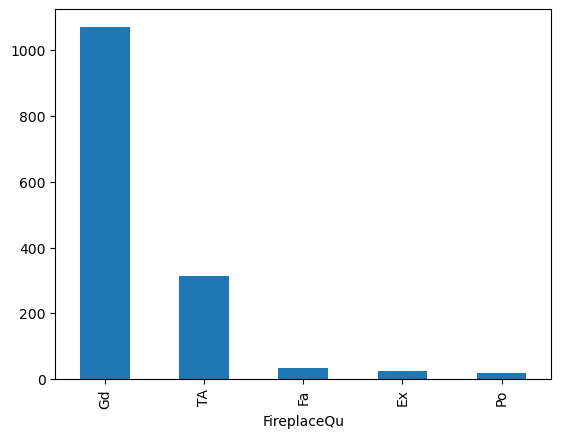

In [17]:
df['FireplaceQu'].value_counts().plot(kind='bar')

#### KDE plot after filling missing values - FireplaceQu

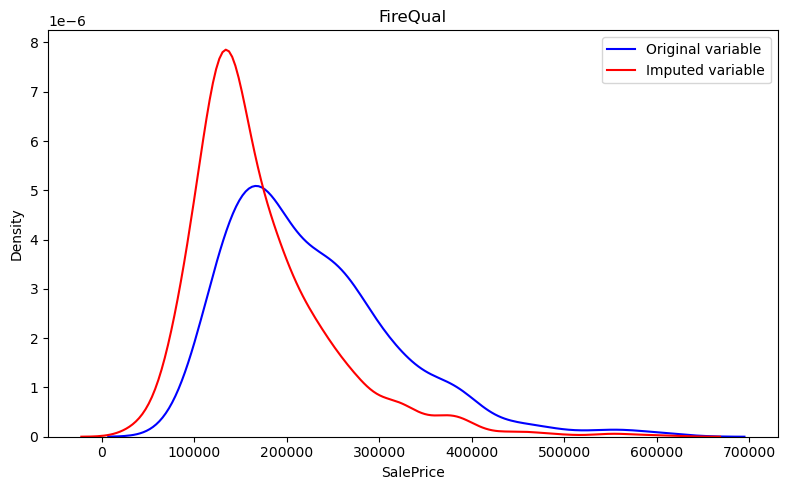

In [18]:
plt.figure(figsize=(8, 5))

# KDE of original (before imputation)
sns.kdeplot(
    data=temp_df,
    color='blue',
    label='Original variable'
)

# KDE of imputed (after filling with 'Gd', or values now marked as 'Gd')
sns.kdeplot(
    data=df[df['FireplaceQu'] == 'Gd']['SalePrice'],
    color='red',
    label='Imputed variable'
)

plt.title('FireQual')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* There is a distortion in distribution for FireplaceQu column. Hence it is not advised to use most frequent imputation on FireplaceQu column

### Using Scikit-Learn

### Train Test split

In [19]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 2), (292, 2), (1168,), (292,))

### Simple Imputer

In [22]:
imputer = SimpleImputer(strategy='most_frequent')

In [23]:
transformer = ColumnTransformer(
    transformers=[
        ('Imputer', imputer, ['GarageQual', 'FireplaceQu'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=True,
    verbose=True
)

In [24]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

[ColumnTransformer] ....... (1 of 1) Processing Imputer, total=   0.0s


In [25]:
X_train

array([['TA', 'Gd'],
       ['TA', 'TA'],
       ['TA', 'Gd'],
       ...,
       ['TA', 'Gd'],
       ['TA', 'Gd'],
       ['TA', 'TA']], dtype=object)

In [26]:
transformer.named_transformers_['Imputer'].statistics_

array(['TA', 'Gd'], dtype=object)